In [1]:
def give_me_df(ticker): 
    import yfinance as yf
    import pandas as pd
    stock = yf.Ticker(ticker) 
    df = stock.history(period='max')
    df[ticker] = df.Close.pct_change() 
    return df[[ticker]].iloc[1:]

In [7]:
df = give_me_df('FB')
dg = give_me_df('SPY')
dh = df.join(dg, how='inner')

x_train, y_train = dh.iloc[-200:-100].SPY.values.reshape((-1,1)), dh.iloc[-200:-100].FB.values
x_test, y_test = dh.iloc[-100:].SPY.values.reshape((-1,1)), dh.iloc[-100:].FB.values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 1) (100,)
(100, 1) (100,)


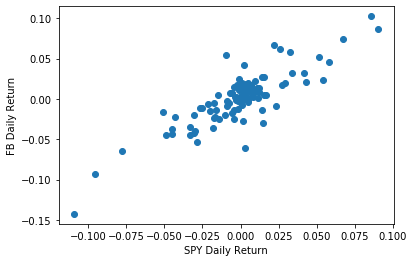

In [9]:
import matplotlib.pyplot as plt
plt.plot(x_train.reshape((-1,)), y_train, 'o')
plt.xlabel('SPY Daily Return')
plt.ylabel('FB Daily Return')
plt.show()

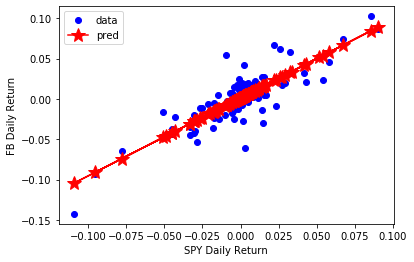

직선의 기울기 : 0.9670643895233377
y절편 : 0.001409616599015536


In [28]:
from sklearn.linear_model import LinearRegression
a = LinearRegression() 
a.fit(x_train, y_train) # 트레인 
y_train_pred = a.predict(x_train) # 예측

import matplotlib.pyplot as plt
plt.plot(x_train.reshape((-1,)), y_train, 'ob', label='data')
plt.plot(x_train.reshape((-1,)), y_train_pred, '-*r', ms=15, label='pred')
plt.xlabel('SPY Daily Return')
plt.ylabel('FB Daily Return')
plt.legend()
plt.show()

print(f'직선의 기울기 : {a.coef_[0]}')
print(f'y절편 : {a.intercept_}')

In [11]:
print(dir(a))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_set_intercept', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'n_jobs', 'normalize', 'predict', 'score', 'set_params']


In [29]:
df_1 = give_me_df('FB')
df_2 = give_me_df('SPY')
df_3 = give_me_df('AAPL')
dh = df_1.join(df_2, how='inner').join(df_3, how='inner')

x_train, y_train = dh.iloc[-200:-100][['SPY','AAPL']].values, dh.iloc[-200:-100].FB.values
x_test, y_test = dh.iloc[-100:][['SPY','AAPL']].values, dh.iloc[-100:].FB.values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(100, 2) (100,)


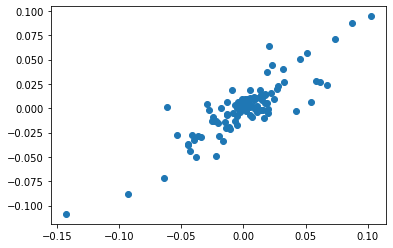

직선의 기울기 : [0.43297395 0.47819042]
y절편 : 0.0002803543693761704


In [31]:
from sklearn.linear_model import LinearRegression
a = LinearRegression() 
a.fit(x_train, y_train) # 트레인 
y_train_pred = a.predict(x_train) # 예측

import matplotlib.pyplot as plt
plt.plot(y_train, y_train_pred, 'o')
plt.show()

print(f'직선의 기울기 : {a.coef_}')
print(f'y절편 : {a.intercept_}')